In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from giFunctions import *

p = giInit()

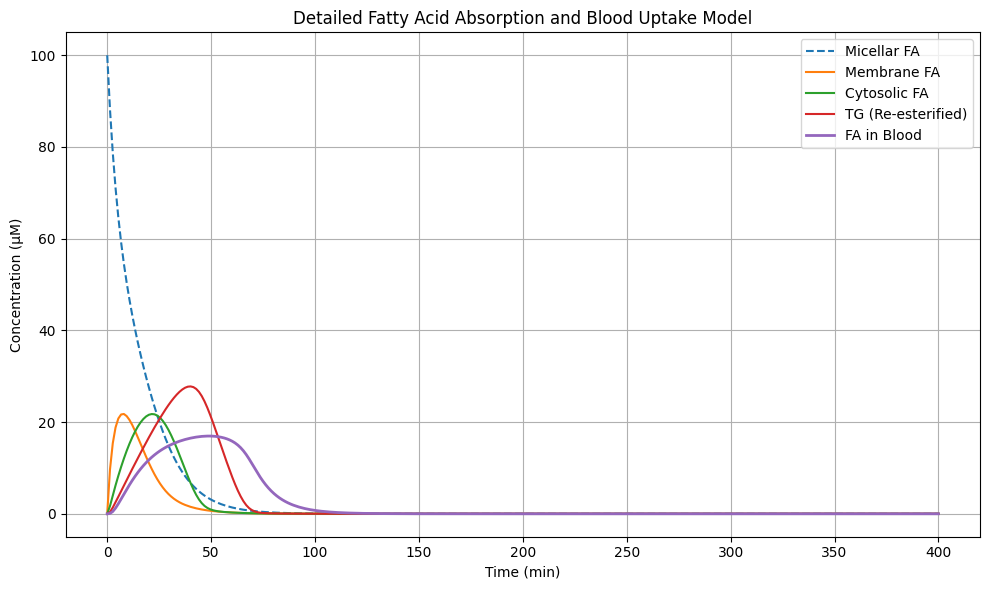

In [2]:

# Initial conditions: [Micelle, Membrane, Cytosol FA, TG, Blood FA]
FA_y0 = [100.0, 0.0, 0.0, 0.0, 0.0]

# Simulate
t_span = (0, 400)
t_eval = np.linspace(*t_span, 300)

solution = solve_ivp(fatty_acid_full_model, t_span, FA_y0, t_eval=t_eval, args=(p,))
FA_mic, FA_mem, FA_cyto, TG_cyto, FA_blood = solution.y

# Plot
plt.figure(figsize=(10, 6))
plt.plot(solution.t, FA_mic, label='Micellar FA', linestyle='dashed')
plt.plot(solution.t, FA_mem, label='Membrane FA')
plt.plot(solution.t, FA_cyto, label='Cytosolic FA')
plt.plot(solution.t, TG_cyto, label='TG (Re-esterified)')
plt.plot(solution.t, FA_blood, label='FA in Blood', linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (µM)')
plt.title('Detailed Fatty Acid Absorption and Blood Uptake Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



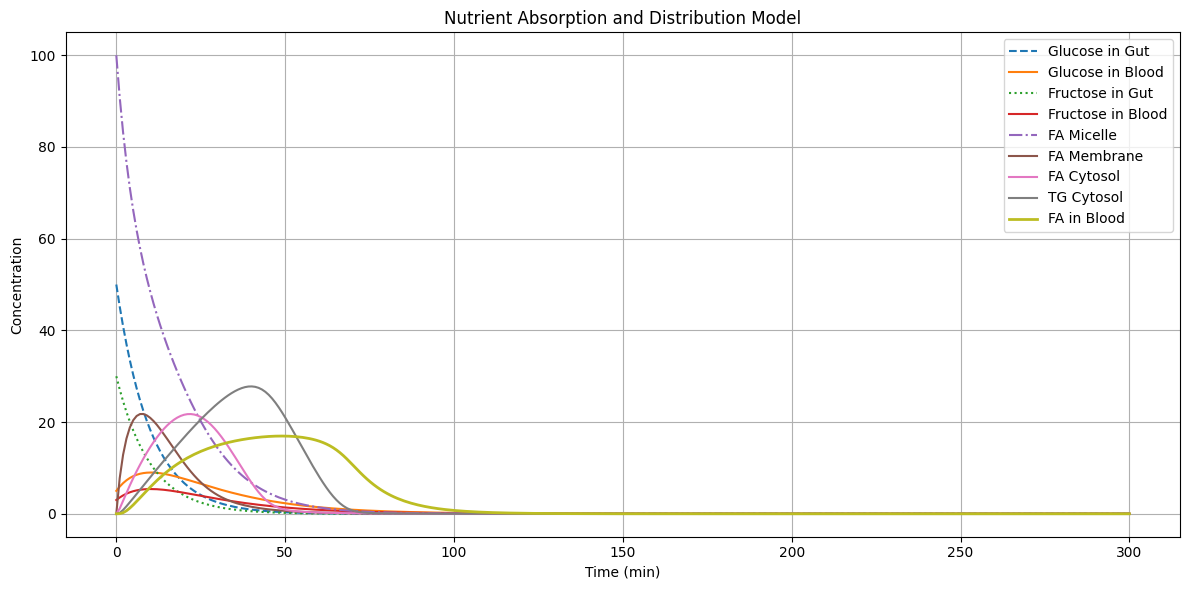

In [3]:

#Initial Conditions

glucose_y0 = [50, 5]
fructose_y0 = [30, 3]
fatty_acid_y0 = [100.0, 0.0, 0.0, 0.0, 0.0]  # Micelle, Membrane, Cytosol, TG, Blood

#Simulation Setup

t_span = (0, 300)
t_eval = np.linspace(*t_span, 300)

glucose_solution = solve_ivp(glucose_two_compartment, t_span, glucose_y0, t_eval=t_eval, args=(p,))
fructose_solution = solve_ivp(fructose_two_compartment, t_span, fructose_y0, t_eval=t_eval, args=(p,))
fatty_acid_solution = solve_ivp(fatty_acid_full_model, t_span, fatty_acid_y0, t_eval=t_eval, args=(p,))

#Plotting

plt.figure(figsize=(12, 6))

# Glucose
plt.plot(glucose_solution.t, glucose_solution.y[0], label='Glucose in Gut', linestyle='dashed')
plt.plot(glucose_solution.t, glucose_solution.y[1], label='Glucose in Blood')

# Fructose
plt.plot(fructose_solution.t, fructose_solution.y[0], label='Fructose in Gut', linestyle='dotted')
plt.plot(fructose_solution.t, fructose_solution.y[1], label='Fructose in Blood')

# Fatty Acids
FA_mic, FA_mem, FA_cyto, TG_cyto, FA_blood = fatty_acid_solution.y
plt.plot(fatty_acid_solution.t, FA_mic, label='FA Micelle', linestyle='dashdot')
plt.plot(fatty_acid_solution.t, FA_mem, label='FA Membrane')
plt.plot(fatty_acid_solution.t, FA_cyto, label='FA Cytosol')
plt.plot(fatty_acid_solution.t, TG_cyto, label='TG Cytosol')
plt.plot(fatty_acid_solution.t, FA_blood, label='FA in Blood', linewidth=2)

plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.title('Nutrient Absorption and Distribution Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#should be crossing at the peak. area under FA in is much smaller than area of FA under the blood. something wrong with last equation
#start out with linear kinetics 
#next week: butyrate (changes the hormones in body, created in gut by gut microbiome from fiber. Put in butyrate if putting in hormones), hormones

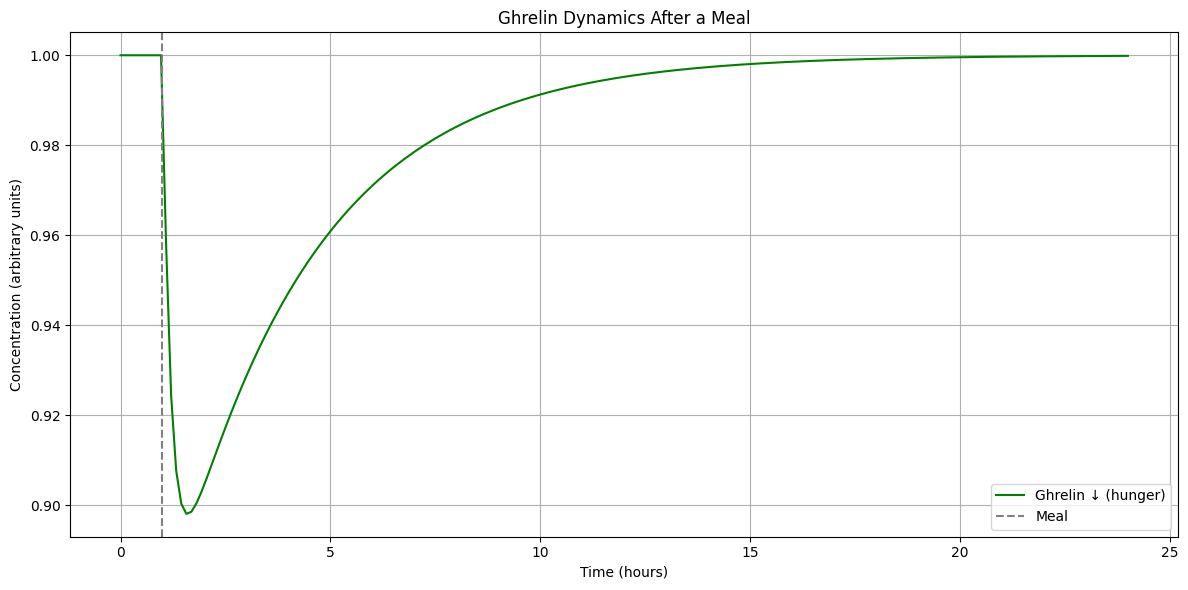

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#ghrelin = hunger hormone, drops after a meal

# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 5 hours)
t = np.linspace(0, 24, 200)


# GHRELIN: hunger hormone, drops after meal
def ghrelin_model(H, t):
    baseline = 1.0
    k_elim = 0.3
    
    # Apply meal effect only for times after t_meal (check if the current time `t` >= `t_meal`)
    meal_effect = -0.61 * np.exp(-5 * (t - t_meal)) if t >= t_meal else 0
    
    # Rate of change of ghrelin
    dHdt = -k_elim * (H - baseline) + meal_effect
    return dHdt


# Combined ODE system with only Ghrelin
def hormone_system(y, t):
    ghrelin = y[0]
    # Call the ghrelin model to calculate the rate of change
    return [ghrelin_model(ghrelin, t)]


# Initial value for Ghrelin (baseline)
y0 = [1.0]  # Initial concentration for ghrelin

# Solve the system using odeint
sol = odeint(hormone_system, y0, t)
ghrelin = sol.flatten()  # Flatten the result to a 1D array
 # Unpack the solution to get ghrelin values over time

# -------------------------------
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, ghrelin, label='Ghrelin ↓ (hunger)', color='green')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('Ghrelin Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


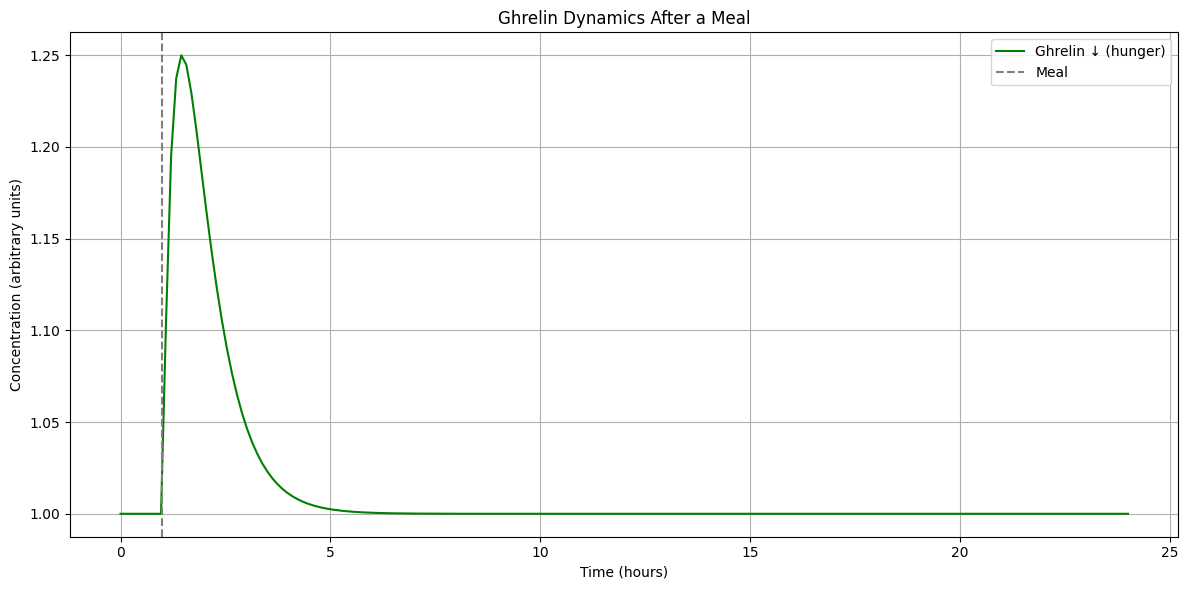

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# produced in intestines and enhances insulin secretion,inhibits glucagon release, slows gastric emptying, promotes feelings of fullness
# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 5 hours)
t = np.linspace(0, 24, 200)


# GHRELIN: hunger hormone, drops after meal
def glp1_model(H, t):
    baseline = 1
    k_elim = 1.5
    meal_effect = 1.5 * np.exp(-3 * (t - t_meal)) if t >= t_meal else 0
    dHdt = -k_elim * (H - baseline) + meal_effect
    return dHdt
#1.5 is a guess, have not found how much it increases yet

# Combined ODE system with only Ghrelin
def hormone_system(y, t):
    glp1 = y[0]
    # Call the ghrelin model to calculate the rate of change
    return [glp1_model(glp1, t)]


# Initial value for Ghrelin (baseline)
y0 = [1.0]  # Initial concentration for ghrelin

# Solve the system using odeint
sol = odeint(hormone_system, y0, t)
ghrelin = sol.flatten()  # Flatten the result to a 1D array
 # Unpack the solution to get ghrelin values over time

# -------------------------------
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, ghrelin, label='Ghrelin ↓ (hunger)', color='green')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('Ghrelin Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
